## Python Week 5: SciPy, Statsmodels, and more

We are now going to look at how we can perform sophisticated techniques in data science and statistics on our data. This is one of the largest uses of python for scientists. Think about what we can do in python that a program like Prism cannot, e.g. Naive Bayes, Hidden-Markov, GLMs, curve fitting etc. IF you're going to be a scientist in the world of big data you NEED to know how to program. So now, without further adieu, lets do some stats.

In [20]:
# import our libraries for today
import scipy as sp
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import Image
%matplotlib inline

### SciPy
SciPy is one of the most sophisticated libraries in Python. Chances are if you need to do soem type of sophisticated data analysis, you'll be using SciPy. Lets look at a few examples below:

Text(0, 0.5, 'Licking Epochs')

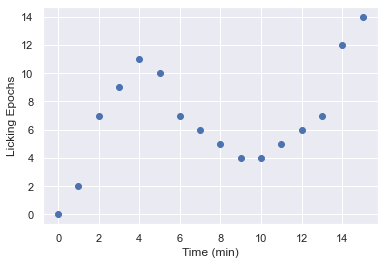

In [2]:
# lets see how we can do data interpolation in SciPy
# lets say we generated the following data from a behavioral experiment

licking_epochs = [0, 2, 7, 9, 11, 10, 7, 6, 5, 4, 4, 5, 6, 7, 12, 14]
time_scale = np.linspace(0, 15, 16)

# lets quickly visualize our data
sb.set()
fig = plt.figure() # create a figure to plot all our results on
plt.scatter(time_scale, licking_epochs) 
plt.xlabel('Time (min)')
plt.ylabel('Licking Epochs')

Text(0, 0.5, 'Licking Epochs')

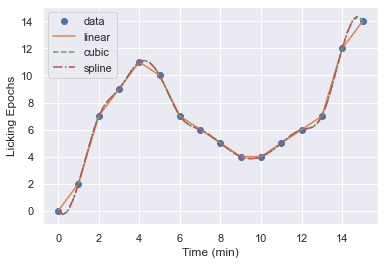

In [3]:
from scipy.interpolate import interp1d, splrep, splev

# 1d vector interpolation
f = interp1d(time_scale, licking_epochs)
f2 = interp1d(time_scale, licking_epochs, kind="cubic")

# new time series
time_new = np.linspace(0,15,1001)

# cubic spline interpolation
tck = splrep(time_scale, licking_epochs, s=0)
xnew = np.arange(0, 15, 0.25)
ynew = splev(xnew, tck, der=0)

sb.set()
fig = plt.plot()
plt.plot(time_scale, licking_epochs, 'o', time_new, f(time_new), '-', time_new, f2(time_new), '--', xnew, ynew, '-.')
plt.legend(['data', 'linear', 'cubic', 'spline'])
plt.xlabel('Time (min)')
plt.ylabel('Licking Epochs')

1-STD Errors: [0.00333337 0.06966098 0.34721076]
Curve of best fit: y = 0.03862449657292323x^3+  -0.8459859233200273x^2+5.022569405691303x


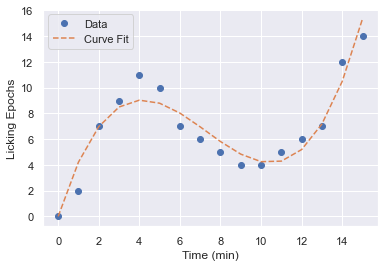

In [4]:
# another thing we can do in scipy is curve fit, lets see what we can do with that behavioral data we generated a bit ago
# first lets generate a fucntion that looks approx. like our data, it looks cubic to me, so
from scipy.optimize import curve_fit

# define a cubic function to fit parameters to
def cubic(x,a,b,c):
    return a*x**3+b*x**2+c*x

# scipy curve fit 
popt, pcov = curve_fit(cubic, time_scale, licking_epochs, p0=(0.03, -0.5, 3))

# plot
sb.set()
plt.plot(time_scale, licking_epochs, 'o', time_scale, cubic(time_scale, *popt), '--')
plt.legend(['Data', 'Curve Fit'])
plt.xlabel('Time (min)')
plt.ylabel('Licking Epochs')

# print some parameters and finished equation
print(f"1-STD Errors: {np.sqrt(np.diag(pcov))}")
print(f"Curve of best fit: y = {popt[0]}x^3+  {popt[1]}x^2+{popt[2]}x")

## Statistics in SciPy and Statsmodels

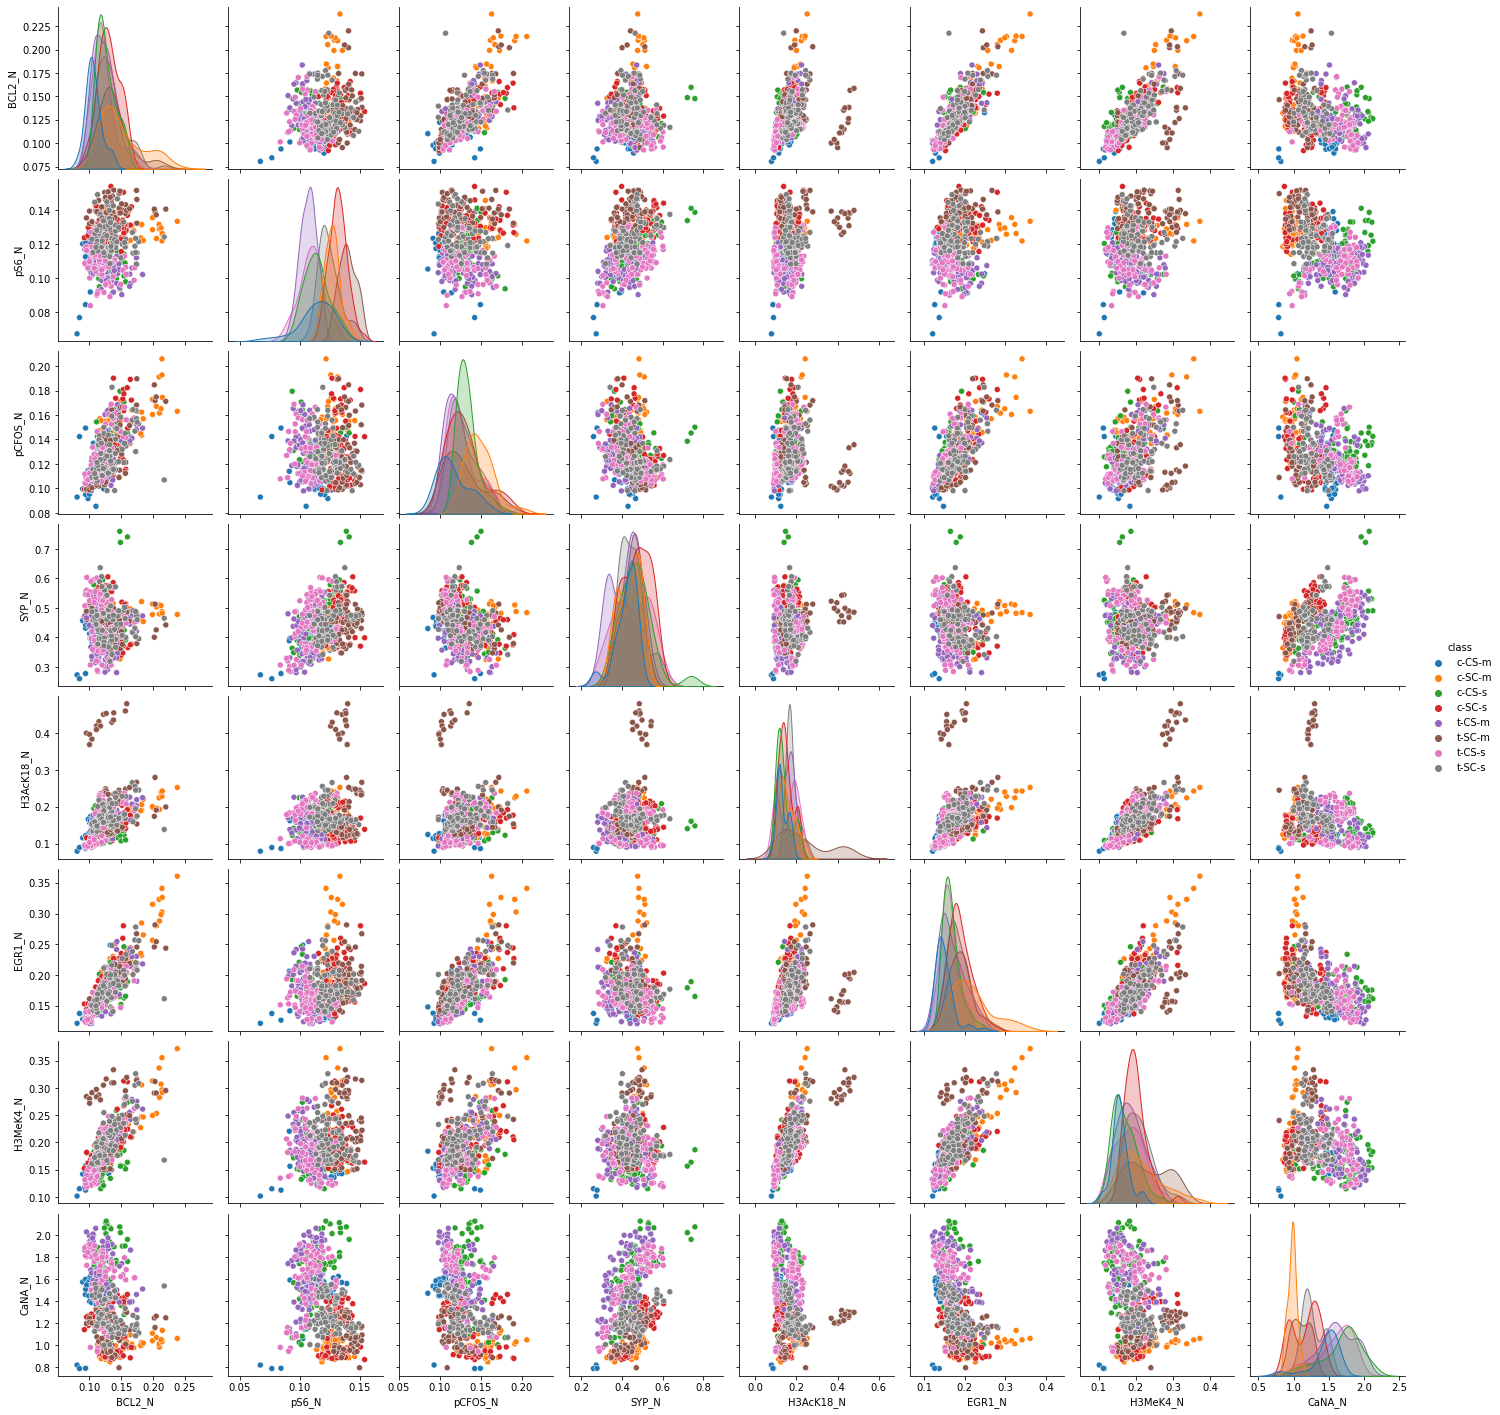

In [5]:
#ok now lets do some cool data science
#import dataset for the rest of today
mouse_protein = pd.read_csv('Data_Cortex_Nuclear.csv')
mouse_protein = mouse_protein.dropna() # drop nan's
mouse_protein1 = mouse_protein.iloc[:, 70:] # take last 12 columns
mouse_protein1 = mouse_protein.drop(['Genotype', 'Treatment', 'Behavior'], axis=1) # remove unnecesarry attributes
# i generated this with sb.pairplot(mouse_protein)
Image(filename='pairplot.png')

Text(0.5, 0.25597575699999997, '***, p=0.000344')

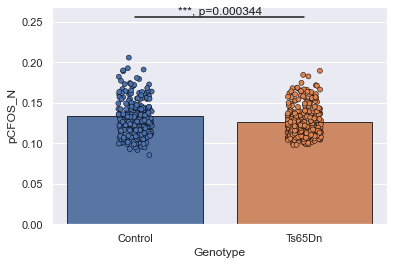

In [6]:
# one of the most obvious applications of statistical libraries is performing hypothesis testing
# as a side note I'm ~aware~ that these test's i'm running may not always be optimal, but I'm here to teach you programming--not statistics

# lets see how we can perform various t-tests in SciPy/StatsModels
# lets first take a peek at t-tests

 
c_fos_t = mouse_protein.loc[mouse_protein['Genotype'] == 'Ts65Dn', 'pCFOS_N']
c_fos_c = mouse_protein.loc[mouse_protein['Genotype'] == 'Control', 'pCFOS_N']

# scipy ind-t

t, p = sp.stats.ttest_ind(c_fos_t, c_fos_c)

mouse_protein_fos = mouse_protein[['Genotype', 'pCFOS_N']]
sb.set()
sb.barplot(x="Genotype", y="pCFOS_N", data=mouse_protein_fos, edgecolor="Black", linewidth=0.75, ci=68)
sb.stripplot(x="Genotype", y="pCFOS_N", data=mouse_protein_fos, size=5, jitter=True, edgecolor="Black", linewidth=0.5)
x0, x1 = 0, 1 # first and second column
y, h, col = mouse_protein_fos['pCFOS_N'].max() + 0.05 , 0.5, 'k'
plt.plot([ x0, x1], [y, y], lw=1.5, c=col)
plt.text((x0+x1)*.5, y+0.0001, f'***, p={p:f}', ha='center', va='bottom', color=col)

Text(0.5, 0.25597575699999997, '***, p=0.000344')

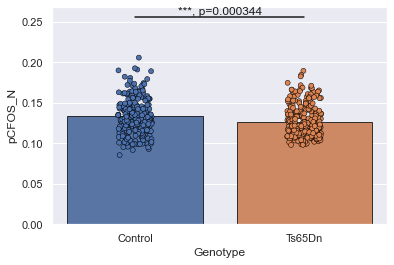

In [7]:
import statsmodels.stats.weightstats as dws
# stats models has a slightlty more complex user experience, it requires we first call the DescrStatW object, then creat a comapre means object,
# and then we can run our test

# create our descriptive stats objects
a = dws.DescrStatsW(c_fos_c)
b = dws.DescrStatsW(c_fos_t)
# comapre means object
ds = dws.CompareMeans(a, b)

# our ttest
tstat, pval, dof = ds.ttest_ind()

# plot the ecxact same chart to show that the behavior is the same
mouse_protein_fos = mouse_protein[['Genotype', 'pCFOS_N']]
sb.set()
sb.barplot(x="Genotype", y="pCFOS_N", data=mouse_protein_fos, edgecolor="Black", linewidth=0.75, ci=68)
sb.stripplot(x="Genotype", y="pCFOS_N", data=mouse_protein_fos, size=5, jitter=True, edgecolor="Black", linewidth=0.5)
x0, x1 = 0, 1 # first and second column
y, h, col = mouse_protein_fos['pCFOS_N'].max() + 0.05 , 0.5, 'k'
plt.plot([ x0, x1], [y, y], lw=1.5, c=col)
plt.text((x0+x1)*.5, y+0.0001, f'***, p={pval:f}', ha='center', va='bottom', color=col)


Text(0.5, 0.356347231, '**** p=0.000000')

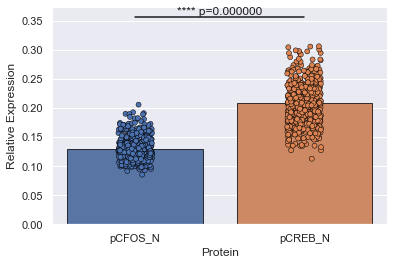

In [8]:
# now lets run a paired t-test
# scipy first again
c_creb = mouse_protein.loc[mouse_protein['Genotype'] == 'Control', 'pCREB_N']

t, p = sp.stats.ttest_rel(c_creb, c_fos_c)

# plot the ecxact same chart to show that the behavior is the same
mouse_protein_fos_cam = mouse_protein[['Genotype', 'pCFOS_N', 'pCREB_N']]
sb.set()
mouse_protein_fos_cam = pd.melt(mouse_protein_fos_cam, id_vars='Genotype', var_name='Protein', value_name="Relative Expression")
sb.barplot(x="Protein", y="Relative Expression", data=mouse_protein_fos_cam, edgecolor="Black", linewidth=0.75, ci=68)
sb.stripplot(x="Protein", y="Relative Expression", data=mouse_protein_fos_cam, size=5, jitter=True, edgecolor="Black", linewidth=0.5)
x0, x1 = 0, 1 # first and second column
y, h, col = mouse_protein_fos_cam['Relative Expression'].max() + 0.05 , 0.5, 'k'
plt.plot([ x0, x1], [y, y], lw=1.5, c=col)
plt.text((x0+x1)*.5, y+0.0001, f'**** p={p:5f}', ha='center', va='bottom', color=col)

Text(0.5, 0.356347231, '**** p=0.000000')

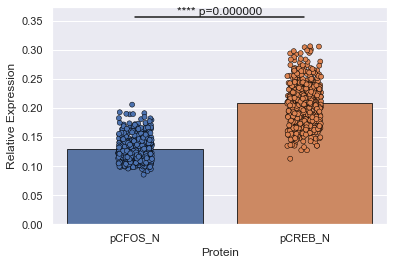

In [9]:
# now lets run a paired t-test
# statsmodels now
c_creb = mouse_protein.loc[mouse_protein['Genotype'] == 'Control', 'pCREB_N']

# create our descriptive stats objects, notice im looking at the difference
a = dws.DescrStatsW(c_creb - c_fos_c)

# stats models does not actually have a paired ttest and expects you to know that a paired ttest is really the difference in two samples compared to zero in 
# a one way sample test
tstat, pval, dof = a.ttest_mean()

# plot the exact same chart to show that the behavior is the same
mouse_protein_fos_cam = mouse_protein[['Genotype', 'pCFOS_N', 'pCREB_N']]
mouse_protein_fos_cam = pd.melt(mouse_protein_fos_cam, id_vars='Genotype', var_name='Protein', value_name="Relative Expression")
sb.set()
sb.barplot(x="Protein", y="Relative Expression", data=mouse_protein_fos_cam, edgecolor="Black", linewidth=0.75, ci=68)
sb.stripplot(x="Protein", y="Relative Expression", data=mouse_protein_fos_cam, size=5, jitter=True, edgecolor="Black", linewidth=0.5)
x0, x1 = 0, 1 # first and second column
y, h, col = mouse_protein_fos_cam['Relative Expression'].max() + 0.05 , 0.5, 'k'
plt.plot([ x0, x1], [y, y], lw=1.5, c=col)
plt.text((x0+x1)*.5, y+0.0001, f'**** p={pval:5f}', ha='center', va='bottom', color=col)

Text(0.5, 0.356347231, '**** p=0.000000')

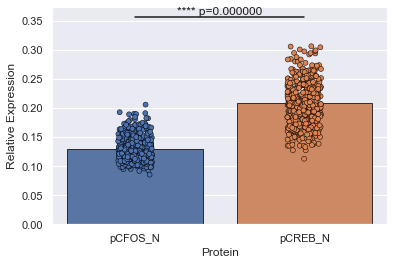

In [10]:
# since we saw how to perform a one way t-test in statsmodels, lets check it out quickly in scipy
# we can compute the paired test this runaround way like in the previous example

# compute difference
difference_protein = c_creb - c_fos_c

t, p = sp.stats.ttest_1samp(difference_protein, 0)

# plot the exact same chart to show that the behavior is the same
mouse_protein_fos_cam = mouse_protein[['Genotype', 'pCFOS_N', 'pCREB_N']]
mouse_protein_fos_cam = pd.melt(mouse_protein_fos_cam, id_vars='Genotype', var_name='Protein', value_name="Relative Expression")
sb.set()
sb.barplot(x="Protein", y="Relative Expression", data=mouse_protein_fos_cam, edgecolor="Black", linewidth=0.75, ci=68)
sb.stripplot(x="Protein", y="Relative Expression", data=mouse_protein_fos_cam, size=5, jitter=True, edgecolor="Black", linewidth=0.5)
x0, x1 = 0, 1 # first and second column
y, h, col = mouse_protein_fos_cam['Relative Expression'].max() + 0.05 , 0.5, 'k'
plt.plot([ x0, x1], [y, y], lw=1.5, c=col)
plt.text((x0+x1)*.5, y+0.0001, f'**** p={p:5f}', ha='center', va='bottom', color=col)

F-Statistic: 14.817452209320763, P-Value: 1.0557978663716713e-17


<AxesSubplot:xlabel='class', ylabel='pCREB_N'>

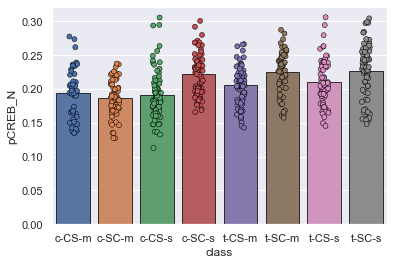

In [11]:
# ok lets move onto the next most popualr tests in neuroscience, the ANOVA!
# the anova is really a type of linear model

# lets do a one way in scipy
c_creb1 = mouse_protein.loc[mouse_protein['class'] == 'c-CS-m', 'pCREB_N'].to_numpy()
c_creb2 = mouse_protein.loc[mouse_protein['class'] == 'c-CS-s', 'pCREB_N'].to_numpy()
c_creb3 = mouse_protein.loc[mouse_protein['class'] == 't-CS-m', 'pCREB_N'].to_numpy()
c_creb4 = mouse_protein.loc[mouse_protein['class'] == 't-CS-s', 'pCREB_N'].to_numpy()
c_creb6 = mouse_protein.loc[mouse_protein['class'] == 'c-SC-m', 'pCREB_N'].to_numpy()
c_creb5 = mouse_protein.loc[mouse_protein['class'] == 'c-SC-s', 'pCREB_N'].to_numpy()
c_creb7 = mouse_protein.loc[mouse_protein['class'] == 't-SC-m', 'pCREB_N'].to_numpy()
c_creb8 = mouse_protein.loc[mouse_protein['class'] == 't-SC-m', 'pCREB_N'].to_numpy()

f, p = sp.stats.f_oneway(c_creb1 ,c_creb2 ,c_creb3 , c_creb4, c_creb5, c_creb6, c_creb7, c_creb8)
print(f'F-Statistic: {f}, P-Value: {p}')

creb = mouse_protein[['class',  'pCREB_N']]
sb.barplot(x="class", y="pCREB_N", data=creb, edgecolor="Black", linewidth=0.75, ci=68)
sb.stripplot(x="class", y="pCREB_N", data=creb, size=5, jitter=True, edgecolor="Black", linewidth=0.5)
# x0, x1 = 0, 1 # first and second column
# y, h, col = mouse_protein_fos_cam['Relative Expression'].max() + 0.05 , 0.5, 'k'
# plt.plot([ x0, x1], [y, y], lw=1.5, c=col)
# plt.text((x0+x1)*.5, y+0.0001, f'**** p={p:5f}', ha='center', va='bottom', color=col)

In [12]:
# now statsmodels version
from statsmodels.stats.oneway import anova_oneway
# this is a fun way to see whats standard/assumed in scipy
anova_oneway([c_creb1,  c_creb2, c_creb3, c_creb4, c_creb5, c_creb6, c_creb7, c_creb8], use_var='equal', welch_correction=False)

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 14.817452209320756
pvalue = 1.0557978663716713e-17
df = (7.0, 532.0)
df_num = 7.0
df_denom = 532.0
nobs_t = 540.0
n_groups = 8
means = [0.19352011 0.19176997 0.20539361 0.21012125 0.22196483 0.18701871
 0.2248175  0.2248175 ]
nobs = [45. 75. 90. 75. 75. 60. 60. 60.]
vars_ = [0.00144956 0.00136868 0.00071925 0.00102083 0.00099911 0.00074083
 0.00098916 0.00098916]
use_var = equal
welch_correction = False
tuple = (14.817452209320756, 1.0557978663716713e-17)

(<AxesSubplot:>, <matplotlib.colorbar.ColorbarBase at 0x7fd40796b430>)

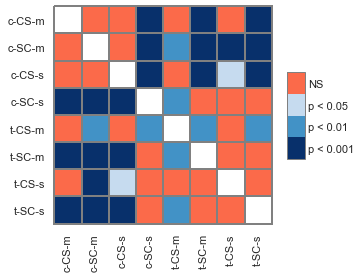

In [13]:
# now lets do a post-hoc test, I'm not gonna show you how to do all of them, documentation is your friend here

# lets do a posthoc ttest
import scikit_posthocs as sph
creb = mouse_protein[['class',  'pCREB_N']]
pvals = sph.posthoc_ttest(creb, val_col='pCREB_N', group_col='class', p_adjust='holm')

# create a sign plot from sci-kit posthoc
cmap = ['1', '#fb6a4a',  '#08306b',  '#4292c6', '#c6dbef']
heatmap_args = {'cmap': cmap, 'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sph.sign_plot(pvals, **heatmap_args)

#i'm not gonna show how to plot these p-values in an easy way, if you have questions we can do a visualization lesson some other time

In [14]:
# now lets look at a two-way anova, after this point i think honestly statsmodels is better so thats all i'm gonna show
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# create a quick df
two_way_df = mouse_protein[['Genotype', 'Treatment', 'pCREB_N']]

# now we need to create a formula object in the patsy syntax, R uses this extensiveley
formula = "pCREB_N ~ two_way_df['Genotype'] + two_way_df['Treatment'] + two_way_df['Genotype']:two_way_df['Treatment']"
model = ols(formula, two_way_df).fit()
aov_table = anova_lm(model, typ=2)
print(aov_table['PR(>F)'].dropna() < 0.05)
aov_table


two_way_df['Genotype']                            True
two_way_df['Treatment']                           True
two_way_df['Genotype']:two_way_df['Treatment']    True
Name: PR(>F), dtype: bool


,sum_sq,df,F,PR(>F)
two_way_df['Genotype'],0.037860,1.0,31.497563,3.174501e-08
two_way_df['Treatment'],0.014678,1.0,12.211569,5.133593e-04
two_way_df['Genotype']:two_way_df['Treatment'],0.005040,1.0,4.192639,4.107604e-02
Residual,0.658697,548.0,NaN,NaN


In [15]:
# now we can do an n-way anova
three_way_df = mouse_protein[['Genotype', 'Treatment', 'Behavior', 'pCREB_N']]

formula = "pCREB_N ~ three_way_df['Genotype'] + three_way_df['Treatment'] + three_way_df['Behavior'] + three_way_df['Genotype']:three_way_df['Treatment'] + three_way_df['Genotype']:three_way_df['Behavior'] +  three_way_df['Treatment']:three_way_df['Behavior'] + three_way_df['Treatment']:three_way_df['Behavior']:three_way_df['Genotype']"
model = ols(formula, two_way_df).fit()
aov_table = anova_lm(model, typ=2)
print(aov_table['PR(>F)'].dropna() < 0.05)
aov_table

three_way_df['Genotype']                                                        True
three_way_df['Treatment']                                                       True
three_way_df['Behavior']                                                        True
three_way_df['Genotype']:three_way_df['Treatment']                              True
three_way_df['Genotype']:three_way_df['Behavior']                              False
three_way_df['Treatment']:three_way_df['Behavior']                              True
three_way_df['Treatment']:three_way_df['Behavior']:three_way_df['Genotype']     True
Name: PR(>F), dtype: bool


,sum_sq,df,F,PR(>F)
three_way_df['Genotype'],0.040588,1.0,36.779014,2.477523e-09
three_way_df['Treatment'],0.013581,1.0,12.306327,4.887681e-04
three_way_df['Behavior'],0.037413,1.0,33.902139,9.916159e-09
three_way_df['Genotype']:three_way_df['Treatment'],0.006000,1.0,5.437171,2.007670e-02
three_way_df['Genotype']:three_way_df['Behavior'],0.000481,1.0,0.435876,5.093990e-01
three_way_df['Treatment']:three_way_df['Behavior'],0.007449,1.0,6.750101,9.628274e-03
three_way_df['Treatment']:three_way_df['Behavior']:three_way_df['Genotype'],0.013295,1.0,12.047617,5.597681e-04
Residual,0.600333,544.0,NaN,NaN


/opt/anaconda3/envs/Networks/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


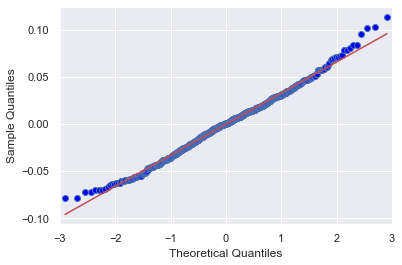

In [16]:
# qqplot of residuals
res = model.resid 
fig = sm.qqplot(res, line='s')
plt.show()

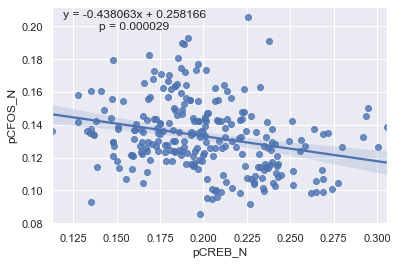

LinregressResult(slope=-0.43806313967199867, intercept=0.25816581013070933, rvalue=-0.25851032638863664, pvalue=2.9272722633931643e-05, stderr=0.10291519474757437, intercept_stderr=0.013878409542179278)

In [17]:
# now lets do some linear regressions
reg_df = mouse_protein.query("Genotype == 'Control'")[['pCFOS_N','pCREB_N']]


a = sp.stats.linregress(c_fos_c, c_creb)

fig, ax = plt.subplots()
sb.regplot(x="pCREB_N", y="pCFOS_N", data=reg_df)
ax.text(0.16, 0.21, f"y = {a[0]:f}x + {a[1]:f}\np = {a[3]:f}", ha='center', va='top')
plt.show()
a

                            OLS Regression Results                            
Dep. Variable:                pCREB_N   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     18.12
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           2.93e-05
Time:                        17:07:25   Log-Likelihood:                 492.57
No. Observations:                 255   AIC:                            -981.1
Df Residuals:                     253   BIC:                            -974.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2582      0.014     18.602      0.0

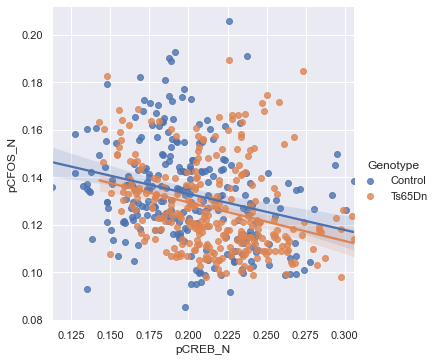

In [18]:
# lets runs some regressions in statsmodels now
mult_reg_df = mouse_protein[['Genotype','pCFOS_N','pCREB_N']]
reg_df1 = mouse_protein.query("Genotype == 'Ts65Dn'")[['pCFOS_N','pCREB_N']]

#for control mice
X = reg_df.pCFOS_N
Y = reg_df.pCREB_N
X = sm.add_constant(X)

# for the down-syndrome mice
X1 = reg_df1.pCFOS_N
Y1 = reg_df1.pCREB_N
X1 = sm.add_constant(X1)

mod = sm.OLS(Y, X)
mod1 = sm.OLS(Y1, X1)
res = mod.fit()
res1 = mod1.fit()

# fig, ax = plt.subplots()
sb.lmplot(x="pCREB_N", y="pCFOS_N", hue="Genotype", data=mult_reg_df);
print(res.summary(), res1.summary())



                 Generalized Linear Model Regression Results                  
Dep. Variable:                  NR1_N   No. Observations:                  552
Model:                            GLM   Df Residuals:                      547
Model Family:                Gaussian   Df Model:                            4
Link Function:               identity   Scale:                        0.035895
Method:                          IRLS   Log-Likelihood:                 137.55
Date:                Mon, 28 Jun 2021   Deviance:                       19.635
Time:                        17:07:26   Pearson chi2:                     19.6
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7525      0.090      8.373      0.0

Text(0.5, 0, 'Animal')

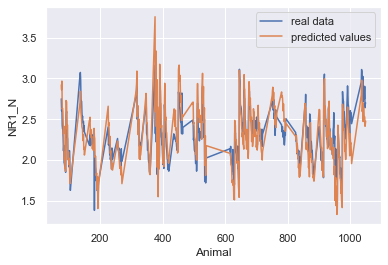

In [19]:
# now lets do some generalized linear modeling

# get some data
glm_dataset = mouse_protein[['pCREB_N', 'pCFOS_N', 'pCAMKII_N', 'BDNF_N']]
glm_dataset = sm.add_constant(glm_dataset)
glm_var = mouse_protein[['NR1_N']]

# fit the model
gaussian_model = sm.GLM(glm_var, glm_dataset, family=sm.families.Gaussian())
gaussian_results = gaussian_model.fit()
print(gaussian_results.summary())

# predict from model
predicted = gaussian_results.predict(glm_dataset)

#plot the model
fig, ax = plt.subplots()
plt.plot(predicted)
plt.plot(glm_var)
ax.legend(['real data', 'predicted values'])
ax.set_ylabel('NR1_N')
ax.set_xlabel('Animal')